In [20]:
#Refs: https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
#https://pythonfordatascience.org/anova-python/


useColab = True

if useColab:
    from google.colab import drive
    drive.mount('/content/gdrive')
    
    recordpath='gdrive/My Drive/Colab Notebooks/00data/record/'
    storagepath='gdrive/My Drive/Colab Notebooks/00data/storage/'
else:
    recordpath='record/'
    storagepath='/home/hdaniel/Downloads/'

if useColab:
  %run gdrive/My\ Drive/Colab\ Notebooks/lib/common.ipynb
else:
  %run common.ipynb

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
common 1.5.1


In [2]:
import scipy.stats as stats
import numpy as np

fixed0 =    [100, 83, 100, 100, 100, 19, 89, 100, 45, 100, 100, 36, 44, 100, 23, 100, 69, 100, 46, 57, 100, 38, 59, 76, 43]
bouncing0 = [109, 26, 65, 28, 23, 167, 34, 54, 30, 50, 57, 200, 200, 200, 200, 41, 42, 67, 66, 200, 21, 200, 41, 179, 33]

fixed = [x for x in fixed0 if x < 100]
print(fixed)
bouncing = [x for x in bouncing0 if x < 100]
print(bouncing)

#print(ages)
fmean  = np.mean(fixed)
bmean  = np.mean(bouncing)
fstdev = np.std(fixed)
bstdev = np.std(bouncing)
tmean  = 45
alpha  = 0.05  #significance level 0.05 or 5% (result should have 95% confidence of giving same result ifor each sample)

print('runs= {}, test mean= {}, fmean= {}({}), bmean= {}({})\n'.format(len(fixed), tmean, fmean, fstdev, bmean, bstdev))

#One sample T-test (student T-test)
tstat, pval = stats.ttest_1samp(fixed, tmean)
print('p-values = {:.10f}'.format(pval))
print('tstat    =', tstat)

if pval < alpha:
    print("rejecting")
else:
    print("accepting")
print("null hypothesis that mean {} is the mean of sample, within a significance level of {}".format(tmean, alpha))  

[83, 19, 89, 45, 36, 44, 23, 69, 46, 57, 38, 59, 76, 43]
[26, 65, 28, 23, 34, 54, 30, 50, 57, 41, 42, 67, 66, 21, 41, 33]
runs= 14, test mean= 45, fmean= 51.92857142857143(20.495519669689084), bmean= 42.375(15.218717915777269)

p-values = 0.2445507619
tstat    = 1.2188673404741261
accepting
null hypothesis that mean 45 is the mean of sample, within a significance level of 0.05


In [3]:
#Two sampled T-test (independente T-test) 
#Test if samples of different experience conditions have same mean (with non-significant diffrences)
tstat, pval = stats.ttest_ind(fixed, bouncing)
print('p-values = {:.10f}'.format(pval))
print('tstat    =', tstat)

if pval < alpha:
    print("rejecting")
else:
    print("accepting")
print("null hypothesis that both means are equal, within a significance level of {}".format(tmean, alpha))  

p-values = 0.1693098433
tstat    = 1.4108279968702373
accepting
null hypothesis that both means are equal, within a significance level of 45


In [4]:
#Two sampled T-test (independente T-test) 
#Test if repeated samples of same experience conditions have same mean (with non-significant diffrences)
ttest, pval = stats.ttest_rel(fixed0, bouncing0)
print('p-values = {:.10f}'.format(pval))
print('tstat    =', tstat)
 
if pval < alpha:
    print("rejecting")
else:
    print("accepting")
print("null hypothesis that both means are equal, within a significance level of {}".format(tmean, alpha))      

p-values = 0.2777388543
tstat    = 1.4108279968702373
accepting
null hypothesis that both means are equal, within a significance level of 45


In [5]:
#Anova
#Test if samples have same mean (with non-significant diffrences)
#assumes that_
#1 The samples are independent
#2 Each sample is from a normally distributed population.
#3 The population standard deviations of the groups are all equal. This property is known as homoscedasticity. (also know as Homogeneity of Variance)
#
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html


#Note fixed0 are not normally distributed NOR have homogein variance

#Normally distributed
#tests the null hypothesis that the data was drawn from a normal distribution
#if pval < alpha (0.05) reject else accept
w, pval = stats.shapiro(fixed0);    print(pval)
w, pval = stats.shapiro(fixed);     print(pval)
w, pval = stats.shapiro(bouncing0); print(pval)
w, pval = stats.shapiro(bouncing);  print(pval)

#Homogeneity of Variance
#tests the null hypothesis that all input samples are from populations with equal variances
w, pval = stats.levene(fixed0, bouncing0)
print(pval) #if pval < alpha (0.05) reject else accept
w, pval = stats.levene(fixed, bouncing)
print(pval) #if pval < alpha (0.05) reject else accept

F, pval = stats.f_oneway(fixed, bouncing)
print('p-values = {:.10f}'.format(pval))
print('F        =', F)

if pval < alpha:
    print("rejecting")
else:
    print("accepting")
print("null hypothesis that both means are equal, within a significance level of {}".format(tmean, alpha))      

0.0005664824857376516
0.6830305457115173
7.300401921384037e-05
0.19544024765491486
0.009861379576979482
0.39817028025929757
p-values = 0.1693098433
F        = 1.990435636752885
accepting
null hypothesis that both means are equal, within a significance level of 45


[29, 25, 22, 17, 4, 0, 0, 0, 0, 0]
[14, 6, 13, 2, 2, 0, 0, 0, 0, 0]
pval = 0.006389 < 0.05, so data DID NOT came from Normal distribution
pval = 0.001237 < 0.05, so data DID NOT came from Normal distribution
OK, pval (0.1140069498983869) >= alpha (0.05)
p-values = 1.0000000000
F        = 0.0
accepting
null hypothesis that both means 9.7 and 3.7 are not statistically different, within a significance level of 0.05


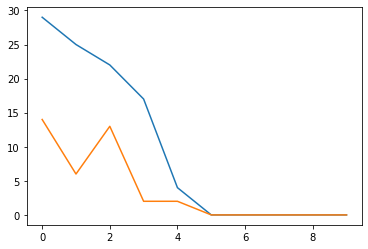

In [22]:
#Show experiences
logFNL1 = recordpath + 'experiments/experiment_AS30-1.0.log'
logseries1 = getLogSeries(logFNL1, False) 
logFNL2 = recordpath + 'experiments/experiment_BS30-1.0.log'
logseries2 = getLogSeries(logFNL2, False) 

exps, runs, means1, mins, maxs, stdevs, nbests1 = lstats(logseries1, measure='acc', best=1.0)
exps, runs, means2, mins, maxs, stdevs, nbests2 = lstats(logseries2, measure='acc', best=1.0)

print(nbests1); plt.plot(nbests1)
print(nbests2); plt.plot(nbests2)

#level of significance
alpha = 0.05
validTest = False
#tests the null hypothesis that the data was drawn from a normal distribution
#if pval < alpha (0.05) reject else accept
w, pval = stats.shapiro(nbests1)
if pval < alpha: print('pval = {:.6f} < {}, so data DID NOT came from Normal distribution'.format(pval, alpha)); 
else:            print('OK, pval ({}) >= alpha ({})'.format(pval, alpha)); validTest = True
w, pval = stats.shapiro(nbests2)
if pval < alpha: print('pval = {:.6f} < {}, so data DID NOT came from Normal distribution'.format(pval, alpha))
else:            print('OK, pval ({}) >= alpha ({})'.format(pval, alpha)); validTest = True

#tests the null hypothesis that all input samples are from populations with equal variances
#if pval < alpha (0.05) reject else accept
w, pval = stats.levene(nbests1, nbests2);
if pval < alpha: print('pval = {:.6f} < {}, so data DID NOT came from populations with equal variances'.format(pval, alpha))
else:            print('OK, pval ({}) >= alpha ({})'.format(pval, alpha)); validTest = True

if not validTest:print ('Following Anova test is NOT valid')
F, pval = stats.f_oneway(nbests1, nbests1)
print('p-values = {:.10f}'.format(pval))
print('F        =', F)
if pval < alpha:
    print("rejecting")
else:
    print("accepting")
print("null hypothesis that both means {} and {} are not statistically different, within a significance level of {}".format(np.mean(nbests1), np.mean(nbests2), alpha))      
